In [1]:
import keras
from keras.layers import concatenate
from keras.models import Model
from keras.layers import Input
from keras.layers.merge import concatenate
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [55]:
Inputs = pd.read_csv('Data_Folder/Demo5_22/5_22_ALL.csv',delimiter=',',header=0,index_col=0)
Wearable = pd.read_csv('Data_Folder/Demo5_22/5_22_wearable_processed.csv',delimiter=',',header=0,index_col=0)
#Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [69]:
Wearable.drop(columns=['Timestamp'], inplace=True)
Wearable

,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1012.0,984.0,960.0,1128.0,1030.0,1217.0
1,1419.0,1005.0,1040.0,1192.0,1698.0,1242.0
2,1197.0,935.0,940.0,1086.0,1454.0,1113.0
3,808.0,860.0,834.0,972.0,889.0,969.0
4,781.0,825.0,793.0,929.0,846.0,932.0
5,765.0,821.0,784.0,920.0,833.0,937.0
6,788.0,836.0,815.0,947.0,866.0,955.0
7,830.0,871.0,855.0,1000.0,934.0,1014.0
8,830.0,1015.0,942.0,1151.0,892.0,1059.0
9,734.0,992.0,940.0,1124.0,856.0,1019.0


In [70]:
X_train, X_test, y_train, y_test = train_test_split(Inputs, Wearable, test_size = 0.2, random_state = 0)


In [71]:
GPS_label_train = pd.DataFrame(X_train.iloc[:,-2:])
GPS_label_test = pd.DataFrame(X_test.iloc[:,-2:])
X_train.drop(X_train.columns[-2:],axis=1,inplace=True)
X_test.drop(X_test.columns[-2:],axis=1,inplace=True)

In [72]:
X_train.shape

(337, 16)

In [73]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train_weather = X_train[:,:10]
X_train_stationary = X_train[:,10:]

X_test_weather = X_test[:,:10]
X_test_stationary = X_test[:,10:]


In [74]:
X_train_weather.shape, X_train_stationary.shape,GPS_label_train.shape, y_train.shape

((337, 10), (337, 6), (337, 2), (337, 6))

In [125]:
inputs_weather = Input(shape=(10,),name='weather')
# weather model
x1 = Dense(32, activation='relu',name='wea_layer_1')(inputs_weather)
x1 = Dense(32, activation='relu',name='wea_layer_2')(x1)
x1 = Dense(32, activation='relu',name='wea_layer_3')(x1)
out_x1 = Dense(6,activation='relu',name='weather_output')(x1)
#model1 = Model(inputs=inputs_weather, outputs=out_x1)


inputs_stationary = Input(shape=(6,),name='stationary')
# stationary model
x2 = Dense(32, activation='relu',name='stat_layer_1')(inputs_stationary)
x2 = Dense(32, activation='relu',name='stat_layer_2')(x2)
x2 = Dense(32, activation='relu',name='stat_layer_3')(x2)
out_x2 = Dense(6,activation='relu',name='stationary_output')(x2)
#model2 = Model(inputs=inputs_stationary, outputs=out_x2)

#GPS_input = Input(shape=(3,),name='GPS_value')
GPS_label = Input(shape=(2,),name='GPS_label')
#middle_layer = concatenate([out_x1,out_x2,GPS_input,GPS_label],axis=1)
middle_layer = concatenate([out_x1,out_x2,GPS_label],axis=1)

# merge models
x = Dense(32, activation='relu', name='weighted')(middle_layer)
main_out = Dense(6, activation='relu',name='main_output')(x)

merged_model = Model(inputs=[inputs_weather,inputs_stationary,GPS_label], outputs=[main_out])

sgd = keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
merged_model.compile(loss='mean_squared_error', optimizer=adadelta)
#history = merged_model.fit([X_train_weather, X_train_stationary,X_train_GPS,GPS_label_train], y_train, validation_data=([X_train_weather, X_train_stationary,X_train_GPS,GPS_label_train], y_train), batch_size=16, epochs=5000)
history = merged_model.fit([X_train_weather, X_train_stationary,GPS_label_train], y_train, validation_data=([X_train_weather, X_train_stationary,GPS_label_train], y_train), batch_size=16, epochs=200)


Train on 337 samples, validate on 337 samples
Epoch 1/200
337/337 [==============================] - 2s 6ms/step - loss: 117954834.3753 - val_loss: 117943464.6884
Epoch 2/200
337/337 [==============================] - 0s 566us/step - loss: 116857166.1588 - val_loss: 106435186.5875
Epoch 3/200
337/337 [==============================] - 0s 345us/step - loss: 102692122.6521 - val_loss: 100929427.4184
Epoch 4/200
337/337 [==============================] - 0s 440us/step - loss: 100095463.2876 - val_loss: 97335264.0950
Epoch 5/200
337/337 [==============================] - 0s 346us/step - loss: 98076791.3591 - val_loss: 109273517.5786
Epoch 6/200
337/337 [==============================] - 0s 291us/step - loss: 97534733.5252 - val_loss: 94316260.3680
Epoch 7/200
337/337 [==============================] - 0s 298us/step - loss: 94087900.8123 - val_loss: 94002190.7418
Epoch 8/200
337/337 [==============================] - 0s 584us/step - loss: 93612407.3137 - val_loss: 90304077.2938
Epoch 9/200


337/337 [==============================] - 0s 322us/step - loss: 80040687.5972 - val_loss: 79645792.1306
Epoch 71/200
337/337 [==============================] - 0s 298us/step - loss: 80066238.0640 - val_loss: 79605179.2285
Epoch 72/200
337/337 [==============================] - 0s 310us/step - loss: 79991238.7928 - val_loss: 79565353.3769
Epoch 73/200
337/337 [==============================] - 0s 328us/step - loss: 79993849.8042 - val_loss: 79595886.3739
Epoch 74/200
337/337 [==============================] - 0s 324us/step - loss: 79829885.3268 - val_loss: 79512592.0593
Epoch 75/200
337/337 [==============================] - 0s 381us/step - loss: 79777967.0868 - val_loss: 79476516.1306
Epoch 76/200
337/337 [==============================] - 0s 345us/step - loss: 79738266.8427 - val_loss: 79435326.7656
Epoch 77/200
337/337 [==============================] - 0s 426us/step - loss: 79819343.6677 - val_loss: 79437723.8932
Epoch 78/200
337/337 [==============================] - 0s 439us/step

337/337 [==============================] - 0s 324us/step - loss: 78027256.2833 - val_loss: 77463533.0682
Epoch 140/200
337/337 [==============================] - 0s 359us/step - loss: 77905585.8180 - val_loss: 77430987.7864
Epoch 141/200
337/337 [==============================] - 0s 331us/step - loss: 77863962.9981 - val_loss: 77398194.8249
Epoch 142/200
337/337 [==============================] - 0s 332us/step - loss: 77789294.7815 - val_loss: 77382809.5905
Epoch 143/200
337/337 [==============================] - 0s 333us/step - loss: 77783718.4896 - val_loss: 77324512.2374
Epoch 144/200
337/337 [==============================] - 0s 320us/step - loss: 77974949.9128 - val_loss: 77294222.0534
Epoch 145/200
337/337 [==============================] - 0s 294us/step - loss: 77952611.1217 - val_loss: 77275891.2997
Epoch 146/200
337/337 [==============================] - 0s 292us/step - loss: 77643076.4273 - val_loss: 77247983.8101
Epoch 147/200
337/337 [==============================] - 0s 29

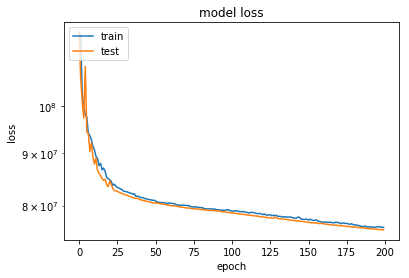

In [126]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.yscale('log')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [127]:
#from keras.utils import plot_model
#plot_model(merged_model, to_file='model.png')

In [128]:
#y_pred = merged_model.predict([X_test_weather,X_test_stationary,X_test_GPS, GPS_label_test])
y_pred = merged_model.predict([X_test_weather,X_test_stationary, GPS_label_test])

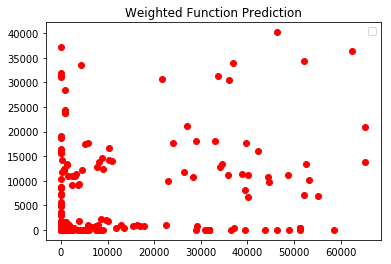

In [129]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

In [130]:
mse = mean_squared_error(y_test, y_pred)
print mse

165555488.753149
